In [13]:
import numpy as np
import jax.numpy as jnp
from jax import random, jit
from matplotlib import pyplot as plt

In [14]:
v = 14080
alpha = 0.5
beta = 0.7

In [15]:
seed = 0
key = random.key(seed)
crosses = []
d_list = [100,200,400,800,1600,3200,6400,12800]

indices_vec = jnp.arange(v*1.0) + 1
b = jnp.power(indices_vec,-beta)
a = jnp.power(indices_vec,-alpha-beta)
D_vec = jnp.power(indices_vec,-2*alpha)
sqrt_D = jnp.diag(jnp.sqrt(D_vec))

for d in d_list:
    one = jnp.ones(shape=(d,))
    tau = 1 / jnp.sqrt(d)

    key, Z_key = random.split(key)
    Z = random.normal(Z_key, shape=(v,d)) / jnp.sqrt(d)

    cross = jnp.linalg.norm(tau * sqrt_D @ Z @ jnp.outer(one,a), ord=2)
    print("Cross: {}".format(cross))
    crosses.append(cross)

Cross: 0.3950224220752716
Cross: 0.26178422570228577
Cross: 0.16439968347549438
Cross: 0.14081360399723053
Cross: 0.0917225331068039
Cross: 0.06589566916227341
Cross: 0.04833834245800972
Cross: 0.03101317584514618


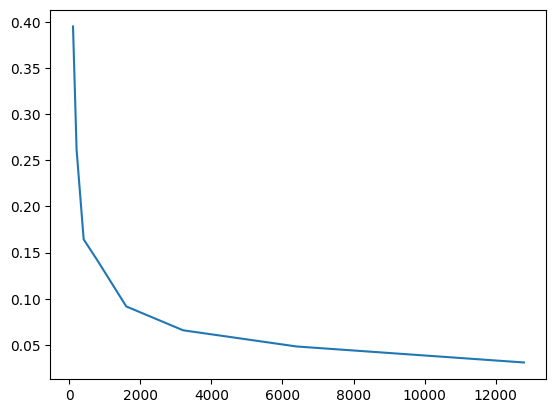

: 

In [ ]:
plt.plot(d_list,crosses)